## Functions for plotting any sybsystem data

In [5]:
import sys, os

from astropy import units as u
from astropy.units import Quantity
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

sys.path.append(os.path.abspath(os.path.join("..")))

from digital_twin.constants import mode_dict
from digital_twin.plotting import find_x_scale

In [ ]:
def plot_dashboard(
    modes: np.ndarray,
    eclipses: np.ndarray,
    visibility: np.ndarray,
    tofs: np.ndarray,
    duration_sim: Quantity["time"],
    title: str,
    save_filename: str = None,
    show: bool = True,
) -> None:
    """Plot operating modes during simulation to visualize them throughout time."""

    modes = [int(mode) for mode in modes]

    # update what the x_axis scale should be
    x_label, x_label_f = find_x_scale(duration_sim)

    # Mode names
    mode_labels = [mode_dict[key] for key in sorted(mode_dict.keys())]
    colors = ["#5cb85c", "#d9534f", "#5bc0de", "#f0ad4e", "#a0522d", "#6f42c1"]

    fig, axes = plt.subplots(
        3, 1, figsize=(6, 3.5), gridspec_kw={"height_ratios": [1, 1, 6]}, sharex=True
    )

    # AX 0
    for i in range(1, len(tofs)):
        if visibility[i - 1] == 1:
            axes[0].hlines(0, tofs[i - 1], tofs[i], colors="pink", linewidth=5)
        else:
            axes[0].hlines(0, tofs[i - 1], tofs[i], colors="grey", linewidth=5)

    # Extend the last line if the last value is True (1)
    length_unit = duration_sim.value / len(modes)
    if visibility[-1] == 1:
        axes[0].hlines(0, tofs[-1], tofs[-1] + length_unit, colors="pink", linewidth=5)

    # Hide y-ticks and y-axis label, focus on horizontal bars
    axes[0].set_yticks([])
    # axes[0].set_xticks([])
    axes[0].set_ylabel("Visibility", fontsize=8)
    axes[0].yaxis.label.set(rotation="horizontal", ha="right", va="center")

    axes[0].xaxis.set_ticks_position("none")  # Remove x-ticks
    axes[0].spines["top"].set_color((0.8, 0.8, 0.8))
    axes[0].spines["right"].set_color((0.8, 0.8, 0.8))
    axes[0].spines["left"].set_color((0.8, 0.8, 0.8))
    axes[0].spines["bottom"].set_color((0.8, 0.8, 0.8))
    axes[0].xaxis.set_major_formatter(FuncFormatter(x_label_f))
    axes[0].set_title(title, fontsize=13, fontweight="medium")

    visibility_handle = plt.Line2D(
        [0], [0], color="orchid", linewidth=5, label="Satellite is visible"
    )

    # AX 1
    for i in range(1, len(tofs)):
        if eclipses[i - 1] == 1:
            axes[1].hlines(0, tofs[i - 1], tofs[i], colors="grey", linewidth=5)
        else:
            axes[1].hlines(0, tofs[i - 1], tofs[i], colors="gold", linewidth=5)

    # Extend the last line if the last value is True (1)
    length_unit = duration_sim.value / len(modes)
    if eclipses[-1] == 1:
        axes[1].hlines(0, tofs[-1], tofs[-1] + length_unit, colors="gold", linewidth=5)

    # Hide y-ticks and y-axis label, focus on horizontal bars
    axes[1].set_yticks([])
    # axes[1].set_xticks([])
    axes[1].set_ylabel("Sunlight", fontsize=8)
    axes[1].yaxis.label.set(rotation="horizontal", ha="right", va="center")

    axes[1].xaxis.set_ticks_position("none")  # Remove x-ticks
    axes[1].spines["top"].set_color((0.8, 0.8, 0.8))
    axes[1].spines["right"].set_color((0.8, 0.8, 0.8))
    axes[1].spines["left"].set_color((0.8, 0.8, 0.8))
    axes[1].spines["bottom"].set_color((0.8, 0.8, 0.8))
    axes[1].xaxis.set_major_formatter(FuncFormatter(x_label_f))

    eclipse_handle = plt.Line2D(
        [0], [0], color="gold", linewidth=5, label="Satellite receives sunlight"
    )

    # AX 2
    # plt.figure(figsize=(6, 3.5))
    axes[2].set_ylim(-0.6, len(mode_labels) - 0.3)  # Adjust limits to avoid space

    # Manually add horizontal grid lines at each mode level to make grid
    for y in range(len(mode_labels)):
        axes[2].axhline(
            y=y, color="gray", linestyle="--", linewidth=0.8
        )  # Add horizontal grid lines

    # Create the step plot using horizontal lines (hlines)
    for i in range(1, len(tofs)):
        axes[2].hlines(
            modes[i - 1],
            tofs[i - 1],
            tofs[i],
            colors=colors[modes[i - 1]],
            linewidth=10,
        )
    axes[2].hlines(
        modes[-1],
        tofs[-1],
        tofs[-1] + length_unit,
        colors=colors[modes[-1]],
        linewidth=10,
    )  # Extend last line

    # plt.title("Satellite Modes Over Time", fontsize=13, fontweight="medium")
    axes[2].set_xlabel(x_label, fontsize=11)

    # Add a legend
    mode_handles = [
        plt.Line2D([0], [0], color=colors[i], linewidth=5)
        for i in range(len(mode_labels))
    ]

    axes[2].legend(
        mode_handles,
        mode_labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.5),
        ncol=3,
        title="Modes",
    )

    # Hide y-ticks and y-axis label
    axes[2].set_yticks([])
    axes[2].set_ylabel("Operating\nMode", fontsize=8)
    axes[2].yaxis.label.set(rotation="horizontal", ha="right", va="center")

    # ax = plt.gca()
    axes[2].xaxis.set_ticks_position("none")  # Remove x-ticks
    axes[2].spines["top"].set_color((0.8, 0.8, 0.8))
    axes[2].spines["right"].set_color((0.8, 0.8, 0.8))
    axes[2].spines["left"].set_color((0.8, 0.8, 0.8))
    axes[2].spines["bottom"].set_color((0.8, 0.8, 0.8))
    axes[2].xaxis.set_major_formatter(FuncFormatter(x_label_f))

    # Show the plot
    fig.tight_layout()
    plt.subplots_adjust(
        left=None, bottom=None, right=None, top=None, wspace=None, hspace=0
    )
    if save_filename is not None:
        plt.savefig(save_filename)
    if show:
        plt.show()
    else:
        plt.close()

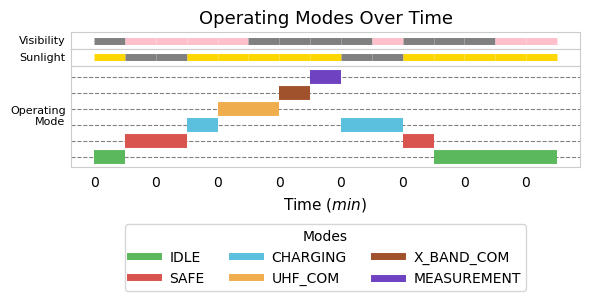

In [ ]:
modes = np.array([0, 1, 1, 2, 3, 3, 4, 5, 2, 2, 1, 0, 0, 0, 0])
eclipses = np.array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])
visibility = np.array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1])
duration_sim = len(modes) * u.s
tofs = np.array(range(int(duration_sim.value)))

plot_dashboard(
    modes, eclipses, visibility, tofs, duration_sim, "Operating Modes Over Time"
)
# plot_modes_with_eclipses(modes, eclipses, tofs, duration_sim)